Learned Policy (Softmax Q-learning):
↗ ↙ ↙ → ↘ X ↘ G
← X ↓ → → → → ↑
↘ → ↘ X ↗ ↗ X ↑
↗ ↘ X X ↗ ← ↗ ↑
X ↘ → ↗ ↑ X ↑ ↑
↘ X ↗ ↗ → ↖ ↗ ↖
→ ↗ X ↗ ↗ → ↖ →
↗ ↑ ↗ ↘ → ↓ ↗ ↓


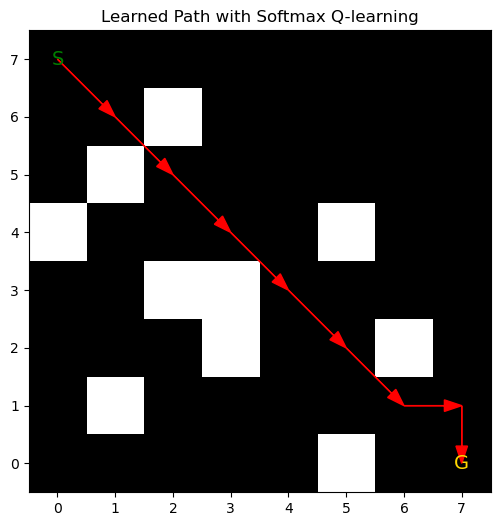

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Grid size (8x8)
rows, cols = 8, 8

obstacles = {
    (0, 5), (1, 1), (2, 3), (2, 6),
    (3, 2), (3, 3), (4, 0), (4, 5),
    (5, 1), (6, 2)
}

start = (7, 0)
goal = (0, 7)

actions = [(-1, 0), (-1, 1), (0, 1), (1, 1),
           (1, 0), (1, -1), (0, -1), (-1, -1)]

action_symbols = ['↑', '↗', '→', '↘', '↓', '↙', '←', '↖']

step_reward = -1
goal_reward = 100

# Initialize Q-values 
Q = np.zeros((rows, cols, len(actions)))

# Learning parameters
alpha = 0.1   # learning rate
gamma = 0.9   # discount factor
tau = 1.0     # softmax temperature
episodes = 5000
max_steps = 200

def valid(r, c):
    return (0 <= r < rows) and (0 <= c < cols) and ((r, c) not in obstacles)

# Softmax function
def softmax(q_values, tau):
    exp_q = np.exp(q_values / tau)
    return exp_q / np.sum(exp_q)

# Q-learning with Softmax action selection
for ep in range(episodes):
    state = start
    for step in range(max_steps):
        r, c = state

        # Action selection using Softmax policy
        probs = softmax(Q[r, c], tau)
        action = np.random.choice(len(actions), p=probs)

        dr, dc = actions[action]
        nr, nc = r + dr, c + dc

        if not valid(nr, nc):
            nr, nc = r, c  

        # Reward assignment
        reward = step_reward
        if (nr, nc) == goal:
            reward = goal_reward

        # Q-value update
        best_next = np.max(Q[nr, nc])
        Q[r, c, action] += alpha * (reward + gamma * best_next - Q[r, c, action])

        # Move agent
        state = (nr, nc)

        if state == goal:
            break

# Final policy 
policy = np.full((rows, cols), ' ')
for r in range(rows):
    for c in range(cols):
        if (r, c) in obstacles:
            policy[r, c] = 'X'
        elif (r, c) == goal:
            policy[r, c] = 'G'
        else:
            best_action = np.argmax(Q[r, c])
            policy[r, c] = action_symbols[best_action]

# Final learned policy
print("Learned Policy (Softmax Q-learning):")
for row in policy:
    print(' '.join(row))

# Extract path from start to goal 
path = [start]
state = start
for _ in range(max_steps):
    r, c = state
    action = np.argmax(Q[r, c])
    dr, dc = actions[action]
    nr, nc = r + dr, c + dc
    if not valid(nr, nc):
        break
    state = (nr, nc)
    path.append(state)
    if state == goal:
        break

# Visualization 
grid = np.zeros((rows, cols))

for (r, c) in obstacles:
    grid[r, c] = -1

plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap="gray_r", origin="upper")

plt.text(start[1], start[0], 'S', ha='center', va='center', fontsize=14, color='green')
plt.text(goal[1], goal[0], 'G', ha='center', va='center', fontsize=14, color='gold')

for i in range(len(path)-1):
    r1, c1 = path[i]
    r2, c2 = path[i+1]
    plt.arrow(c1, r1, c2-c1, r2-r1, color='red',
              head_width=0.2, length_includes_head=True)

plt.title("Learned Path with Softmax Q-learning")
plt.gca().invert_yaxis()
plt.show()